#**Ajuste lineal utilizando el metodo de minimos cuadrados**
El código que se muestra a continuacíon permite realizar ajustes por medio del
método de los mínimos cuadrados

In [1]:
#Linea de codigo para importar la carpeta del drive al ambiente de google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Especificamos la ruta de la carpeta en la cual estaran los datos
from pathlib import Path
# the path of the directory which saves your .py file
src_dir1 = Path('/content/drive/MyDrive/Colab Notebooks/')

# add the path to system path
import sys
try:
  sys.path.index(str(src_dir1))
except ValueError:
  sys.path.insert(0,str(src_dir1))

# print system path
sys.path

In [2]:
#Se importan las librerias necesarias para le funcionamiento del codigo
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Funcion para convertir string a float, devueve un lista np
def str2float(lst):
	return np.array([float(i) for i in lst])

In [4]:
##########Ajuste Lineal de los datos##########
#calculo de la pendiente y el intercepto
def linearAdjust(x_exp, y_exp):
  slope = (n*sum(x_exp*y_exp)-sum(x_exp)*sum(y_exp))/(n*sum(x_exp**2) - sum(x_exp)**2)
  intercept = (sum(x_exp**2)*sum(y_exp) - sum(x_exp)*sum(x_exp*y_exp))/(n*sum(x_exp**2) - sum(x_exp)**2)

  #calculo de la desviacion estandar en Y
  dy=y_exp -(slope*x_exp+intercept)
  Dy = np.sqrt(sum(dy**2)/(n-2))

  #calculo del error en la pendiente
  Dm = Dy*np.sqrt(n/(n*sum(x_exp**2) -sum(x_exp)**2));

  #calculo del error en el intercepto
  Db = Dy/np.sqrt(n);

  #Coeficiente de correlacion lineal
  r1 = (n*sum(x_exp*y_exp)-sum(x_exp)*sum(y_exp));
  r2 = np.sqrt((n*sum(x_exp**2)-sum(x_exp)**2)*(n*sum(y_exp**2)-sum(y_exp)**2));
  r = np.abs(r1/r2);
  #%r = (n*sum(x.*y)-sum(x)*sum(y))/sqrt((n*sum(x.*x)-sum(x)^2)(n*sum(y.*y)-sum(y)^2));

  return slope, intercept, Dm, Db, Dy, r

In [ ]:
#Se pide el nombre de archivo
print("Nombre de archivo de los datos con extension: ", end="")
name = str(input())
#name = "nombre_archivo.csv"
print("Delimitador de campo: ", end="")
delimiter = str(input())
#delimiter = ';'
print("# de linea de inicio de datos: ", end="")
sLine = int(input())
#sLine = '1'

#Cargamos el archivo con los datos, estos deben estar en la misma carpeta del archivo fuente
fileData = np.loadtxt(name,dtype=str, delimiter=delimiter, skiprows = sLine)

Nombre de archivo de los datos con extension: /content/gdrive/MyDrive/Colab Notebooks/dataLineal.csv
Delimitador de campo: ;
# de linea de inicio de datos: 1


In [ ]:
##Proceso de extraccion de los datos del archivo de datos
#x_exp = np.array([float(i) for i in fileData[:,0]])
#y_exp = np.array([float(i) for i in fileData[:,1]])
x_exp = str2float(fileData[:,0])
y_exp = str2float(fileData[:,1])
n = x_exp.size

print("x data: {}".format(x_exp))
print("y data: {}".format(y_exp))
print("# data: {}".format(n))

x data: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
y data: [0.68029655 0.32117377 0.90069757 0.50999763 0.89333931 0.6974341
 0.55848437 1.03126535 1.10260538 0.85417814 0.61478569 1.37404058
 1.20730902 1.30239317 0.96516627 1.66757207 1.87491081 1.75556273
 1.24742562 1.18754021 1.70110435 1.15129752 1.20281623 1.85379455
 1.52236772 1.91267278 1.86780395 2.42936589 1.5638423  2.08798776
 2.28858628]
# data: 31


In [ ]:
#Realizamos el ajuste
pendiente, intercepto, errorP, errorI, errorY, coeficienteR= linearAdjust(x_exp, y_exp)
print("##########Ajuste Lineal de los datos##########")
print("pendiente: {}".format(pendiente))
print("intercepto: {}".format(intercepto))
print("maximo error en Dy: {}".format(errorY))
print("error en Pendiente: {}".format(errorP))
print("error en intercepto: {}".format(errorI))
print("Coeficiente de Correlacion Lineal (R^2): {}".format(coeficienteR))
print("##############################################")

##########Ajuste Lineal de los datos##########
pendiente: 0.515104603634106
intercepto: 0.5282404393698164
maximo error en Dy: 0.28813267291939926
error en Pendiente: 0.05785843304430078
error en intercepto: 0.05175015574347065
Coeficiente de Correlacion Lineal (R^2): 0.8556447420523671
##############################################


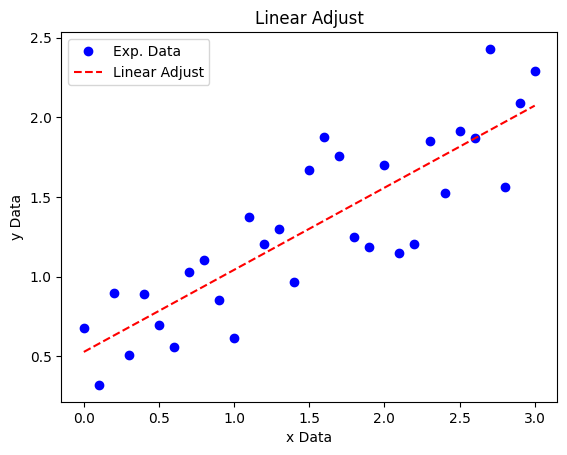

In [ ]:
##Se realiza el grafico del ajuste
x_teo = np.linspace(x_exp[0], x_exp[n-1], n*100)
y_teo = pendiente*x_teo + intercepto

#print("Datos en x: %f", x_exp)
#print("Datos en y: %f", y_exp)
plt.figure()
plt.plot(x_exp,y_exp,"bo", label="Exp. Data")
plt.plot(x_teo,y_teo,"r--", label="Linear Adjust")
plt.xlabel("x Data") ##Se deben cambiar los labels  tanto en x y y
plt.ylabel("y Data")
plt.title("Linear Adjust") ##Con esta instruccion se ajuste el texto
plt.legend()
plt.savefig("linearAdjust.png")
plt.show()

#Se leen los datos en el archivo de texto